In [1]:
from google.colab import files

import matplotlib.pyplot as plt
import pandas as pd
import io

In [2]:
uploaded = files.upload()

Saving Task2.csv to Task2 (1).csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded["Task2 (1).csv"]))

In [5]:
display(df)

,client_id,age,business_dt,restaraunt,money_spent_rub
0,6a0c0626b0f63312cd80be53c8d066b1,35-44,2/2/2023,kfc/rostic’s,431
1,f82ab5238a10eb4513bd7c55e61b71a8,45-54,2/21/2023,kfc/rostic’s,595
2,c99f0d761664243baa53c2ab001e3e97,25-34,2/17/2023,kfc/rostic’s,874
3,0aab007224eb05a44502e37fd3ffebe1,18-24,2/5/2023,kfc/rostic’s,1078
4,e33546ac6db226cac783331372461da0,25-34,2/5/2023,kfc/rostic’s,1350
...,...,...,...,...,...
44079,548fcc5cb11a5d3ed4c597dd86c9c3ae,35-44,2/3/2023,kfc/rostic’s,707
44080,4ba6f64f2ba1d3dcd4c3364066e1fbb9,18-24,2/3/2023,kfc/rostic’s,75
44081,3cbe07f6086ef530adc144a4ffa649d9,35-44,2/11/2023,kfc/rostic’s,468
44082,a754fd1adbb15e75b4b397a5d7e9d9be,25-34,2/19/2023,kfc/rostic’s,297


Проверим данные на пропущенные значения.

In [6]:
print(df.isnull().sum())

client_id          0
age                0
business_dt        0
restaraunt         0
money_spent_rub    0
dtype: int64



Рассмотрим какие уникальные значения присутсвуют в столбцах таблицы.


In [7]:
print(df['age'].value_counts())

35-44    12186
25-34    10603
45-54     8642
18-24     6424
55-64     4106
65+       2123
Name: age, dtype: int64


In [8]:
print(df['restaraunt'].value_counts())

vkusnoitochka    20989
kfc/rostic’s     12745
burger king      10350
Name: restaraunt, dtype: int64


**Промежуточный вывод:** В предоставленной таблице нет пропущенных значений, таблица состоит из пяти столбцов таких как:


1.   client_id - уникальный код клиента
2.   age - возраст клиента
3.   business_dt - дата посещения заведения
4.   restaraunt - место посещения
5.   money_spent_rub - потраченная сумма

1.  Какова динамика трат посетителей в ресторанах? Есть ли дни наибольшего спроса?
Можно ли проследить тренд? Какой ресторан находится на втором месте по
популярности?


restaraunt
burger king      4613076
kfc/rostic’s     6853518
vkusnoitochka    9855189
Name: money_spent_rub, dtype: int64


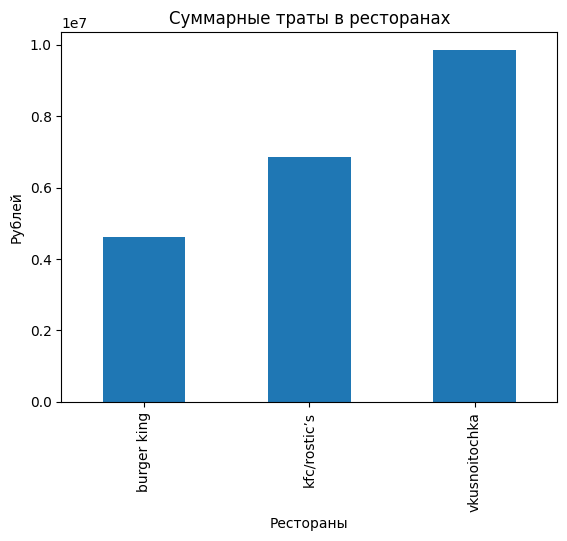

In [9]:
df_groups = df.groupby(['restaraunt'])['money_spent_rub']. sum ()

print(df_groups.head())

df_groups.plot(kind='bar')
plt.ylabel('Рублей')
plt.xlabel('Рестораны')
plt.title('Суммарные траты в ресторанах')
plt.show()

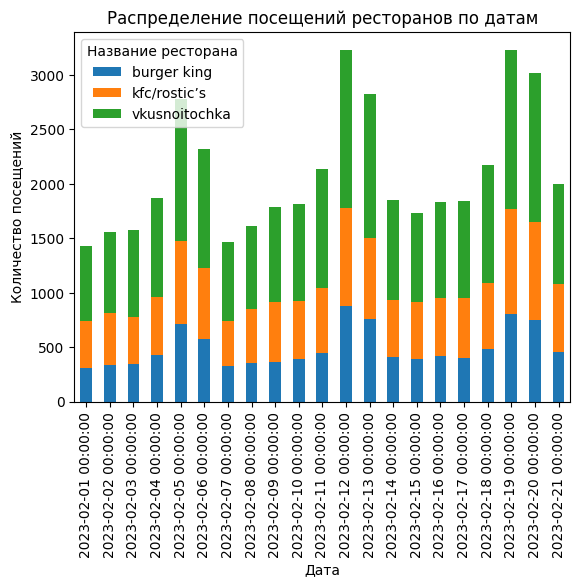

In [10]:
df['business_dt'] = pd.to_datetime(df['business_dt'])

grouped_data = df.groupby(['business_dt', 'restaraunt']).size().reset_index(name='Количество посещений')

pivot_data = grouped_data.pivot(index='business_dt', columns='restaraunt', values='Количество посещений')
pivot_data.plot(kind='bar', stacked=True)

plt.xlabel('Дата')
plt.ylabel('Количество посещений')
plt.title('Распределение посещений ресторанов по датам')
plt.legend(title='Название ресторана')
plt.show()

In [11]:
print('MAX =', df['business_dt'].max())
print('MIN =', df['business_dt'].min())
print('MEAN =', df['business_dt'].mean())

MAX = 2023-02-21 00:00:00
MIN = 2023-02-01 00:00:00
MEAN = 2023-02-11 17:08:48.844932608


Ответ на первы вопрос:

- Динамика трат посетителей меняется в зависимости дня недели, чем ближе выходные тем сильнее возрастают траты посетителй ресторанов

- Дни наибольшего спроса это суббота и воскресенье, скорее всего это связанно с тем, что люди ходят в машазины и проводят время в выходные в торговых центрах и посещают рестораны и кафе

- Да, тренд можно проследить в среднем кажлая неделя на протяжении месяца схожи между собой

- На втором метсе по популярности находится kfs/rostic`s, на первом месте vkusnoitochka, на третьем месте burger king.

2. Каково распредление покупателей по возрасту в каждом из ресторанов?

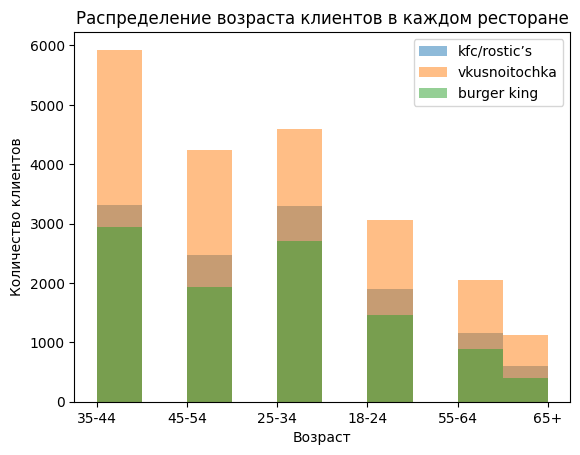

In [12]:
restaurants = df['restaraunt'].unique()

for restaurant in restaurants:
  age_distribution = df[df['restaraunt'] == restaurant]['age']
  plt.hist(age_distribution, bins=10, alpha=0.5, label=restaurant)

plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.title('Распределение возраста клиентов в каждом ресторане')
plt.legend()
plt.show()

Ответ на второй вопрос:

- Ресторан burger king в основном посещают люди от 44 до 25, ресторан kfc/rostic’s посещают люди от 34 до 25, ресторан vkusnoitochka посещают люди от 35 до 44 (этот ресторан посещают в основм люди старших возратов, по сравнению с остальными представленными в этой таблице).

3. Как можно визуализировать одновременно 3 параметра: сумма покупок, средний чек, кол-во покупок?

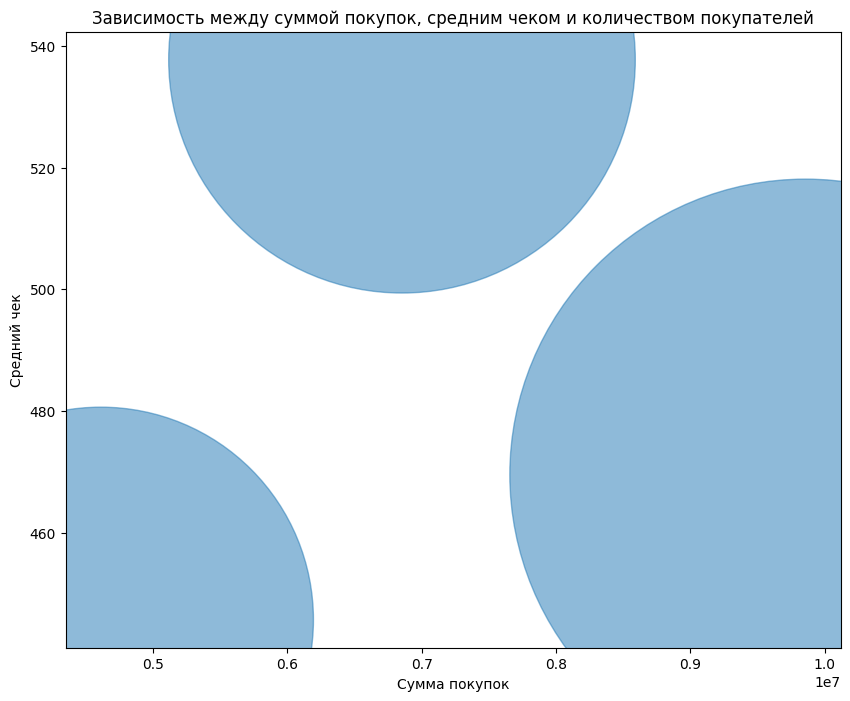

In [13]:
grouped_data = df.groupby("restaraunt")


sum_purchases = grouped_data['money_spent_rub'].sum()
avg_check = grouped_data['money_spent_rub'].mean()
num_customers = grouped_data['client_id'].nunique()


plt.figure(figsize=(10, 8))
plt.scatter(sum_purchases, avg_check, s=num_customers*10, alpha=0.5)
plt.xlabel('Сумма покупок')
plt.ylabel('Средний чек')
plt.title('Зависимость между суммой покупок, средним чеком и количеством покупателей')
plt.show()